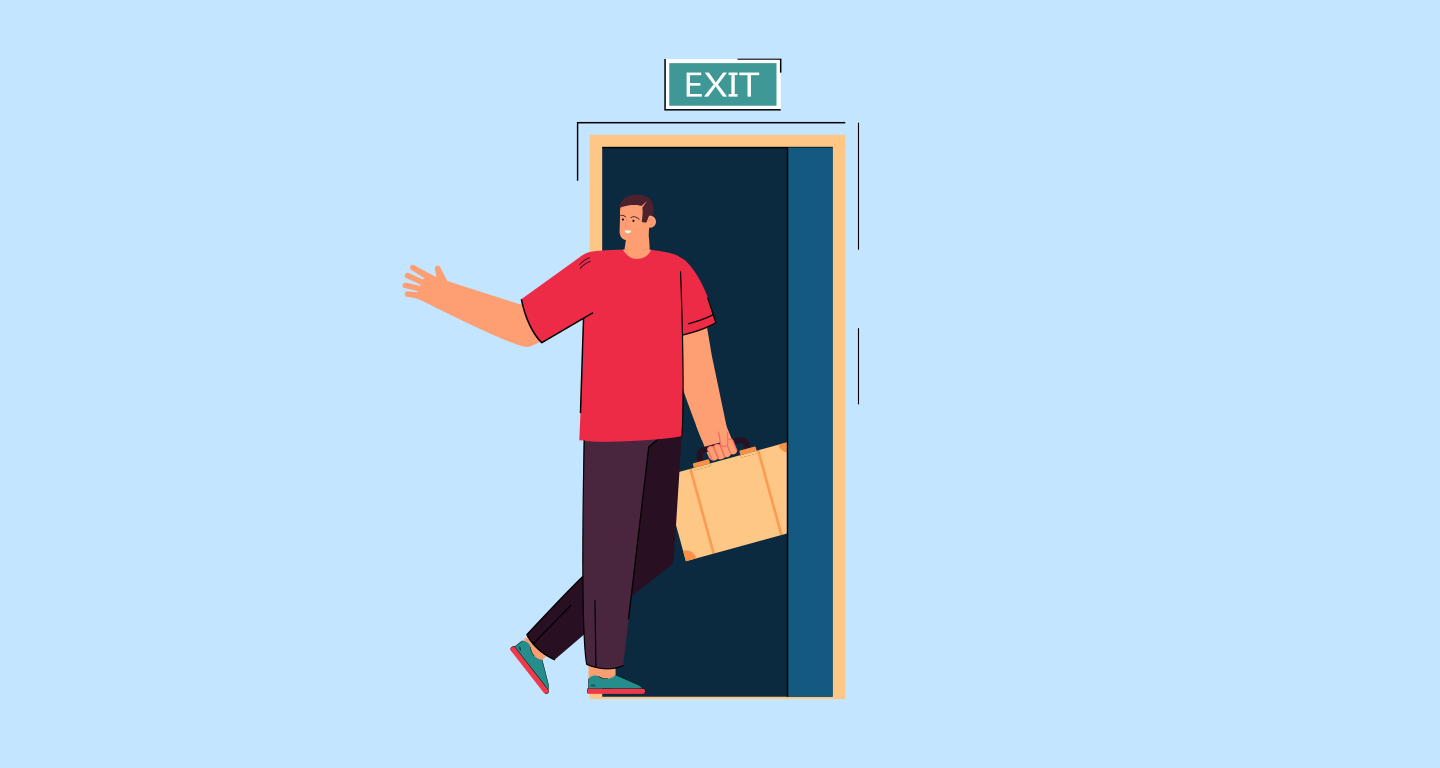
<h1><center>Project: Employee Exit Surveys</center></h1>

#### The Goal
In this project, we aim to cleanse and subsequently analyze exit surveys obtained from employees associated with the Technical and Further Education ([TAFE](https://en.wikipedia.org/wiki/Technical_and_further_education)) and the Department of Education, Training and Employment ([DETE](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland))) body of the Queensland government in Australia. The primary focus of this project lies in the cleansing of the datasets, demonstrating proficiency in the skills within this domain. Subsequent to the data cleansing process, the analytical phase will ensue.

#### What are exit surveys?
Exit surveys are questionnaires or assessments administered to individuals leaving an organization, institution, or program. The purpose of these surveys is to collect feedback, insights and opinions from departing members such as employees, students or participants. The goal of exit surveys is to understand the reasons for leaving, gather information about the individual's experiences, and identify areas for improvement within the organization or program. The data collected from exit surveys can be valuable for making strategic decisions, improving organizational processes, and addressing concerns that may contribute to turnover.

#### Assumptions
For the purpose of this study, we hypothetically assume that our stakeholders seek a comprehensive analysis by combining the results of both surveys to answer the following question:

- Is there a noticeable pattern of termination among employees with a short period of service that may indicate dissatisfaction?
- Conversely, is a different trend observed among employees with longer years of service?

#### The Data
The TAFE exit survey is accessible [here](https://data.gov.au/error?errorCode=404&recordType=Dataset&recordId="ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e"), and the DETE survey can be accessed [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). 

Displayed below is a preview of selected columns that will be utilized in our analysis from the datasets:

`dete_survey.csv`:
- `ID`: An id used to identify the participant of the survey
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE
- `SeparationType`: The reason why the person's employment ended


`tafe_survey.csv`:
- `Record ID`: An id used to identify the participant of the survey
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)
- `Reason for ceasing employment`: The reason why the person's employment ended

Lets start!

*This project was completed as part of the Data Science Career Path offered by dataquest.io.*

#### Data Exploration

In [1]:
# Import Packages for analysis
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Parameters for visualization
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# Show more columns to avoid truncatination
pd.options.display.max_columns = 150 
pd.options.display.max_rows= 75

In [2]:
# Import Data
dete = pd.read_csv('dete_survey.csv')
tafe = pd.read_csv('tafe_survey.csv')

In [3]:
# Exploration of the data
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
# Look for missing values
dete.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [7]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [8]:
tafe.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

First, we imported and examined the datasets. The DETE dataset comprises 56 columns, a subset of which exhibits numerous missing values, as evident from the preliminary overview. Similarly, the TAFE dataset encompasses 72 columns, some of which also contain missing values. 

Based on the initial data exploration, we can summarize the following points:

- Both the DETE and TAFE surveys contain numerous columns that are not essential for the intended analysis.
- Despite similarities in content, the two dataframes do have variations in column names.
- The DETE survey data incorporates 'Not Stated' entries to denote missing values, yet these entries are not explicitly classified as NaN.
- Multiple columns or responses within each dataset indicate instances where an employee resigned due to dissatisfaction.

#### Missing Values and Unneccessary Columns

First, we drop some of the columns that we don't need for our analysis and fix the `'Non Stated'` values. For the `DETE` dataset we'll drop column 28 - 48 and for the `TAFE` dataset we'll drop columns 17 - 65.

In [9]:
# Import Data
dete = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
tafe = pd.read_csv('tafe_survey.csv', na_values = 'Not Stated')

In [10]:
# Remove not needed columns
dete_updated = dete.drop(dete.columns[28:49], axis=1)
tafe_updated = tafe.drop(tafe.columns[17:66], axis=1)

In [11]:
# Check new column index
print(dete_updated.columns)
print(tafe_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

#### Rename

Subsequently, we'll standardize the names of the selected columns as part of the preparatory steps, because ultimately we want to combine the dataframes. First we'll adjust the column names from the `DETE` dataframe (lower the names, adding an underscore, replaced the whitespaces) and after that, we renamed a couple of column names from the `TAFE` dataframe.

In [12]:
# Adjust the columns
dete_updated.columns = dete_updated.columns.str.lower().str.strip().str.replace(' ', '_')

# Check new column names
dete_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [13]:
# Adjust TAFE column names to match the names in DETE dataframe
tafe_updated.rename({'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, axis=1, inplace=True)

# Check that the specified column names were updated correctly
tafe_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

#### Filter the Data

Since we are just interested in people who resigned, we can adjust the dataframes so we'll only select separation types containing the string `'Resignation'`.

In [14]:
# Check the DETE separationtype column for unique values
dete_updated['separationtype'].value_counts()

separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64

In [15]:
# Check the TAFE separationtype column for unique values
tafe_updated['separationtype'].value_counts()

separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64

In [16]:
# Extract the first value of 'separationtype' and count unique values
dete_updated['separationtype'] = dete_updated['separationtype'].str.split('-').str[0]
dete_updated['separationtype'].value_counts()

separationtype
Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: count, dtype: int64

In [17]:
# Filter the dataframes for 'separationtype' == 'Resignation', save new dataframe
dete_resignations = dete_updated[dete_updated['separationtype'] == 'Resignation']
tafe_resignations = tafe_updated[tafe_updated['separationtype'] == 'Resignation']

In [18]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
815,817,Resignation,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
819,821,Resignation,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [19]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


#### Datavalidation

In the next stages, we will undertake the cleaning and examination of the `cease_date` and `dete_start_date` columns to ensure the correctness of all the years.

- `cease_date` represents the final year of an individual's employment
-  `dete_start_date` signifies the initial year of employment

Hence, it would be illogical to have years beyond the current date. Furthermore, it is improbable that the `dete_start_date` was before the year 1940, because typically individuals commence their careers in their 20s.

In [20]:
# Check cease_date values
dete_resignations['cease_date'].value_counts()

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: count, dtype: int64

In [21]:
# Create regex pattern to extract year of cease_date column
pattern = r"([2][0-9]{3})" 
dete_date = dete_resignations['cease_date'].str.extract(pattern).astype(float)

# Create a copy of df to avoid error
dete_resignations = dete_resignations.copy() 

# Add the 'cease_date' values
dete_resignations['cease_date'] = dete_date

# Check the values again
dete_resignations['cease_date'].value_counts()

cease_date
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: count, dtype: int64

In [22]:
# Check dete_start_date values
dete_resignations['dete_start_date'].value_counts().sort_values(ascending=False)

dete_start_date
2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1994.0     6
2003.0     6
1992.0     6
1996.0     6
1998.0     6
2002.0     6
1993.0     5
1980.0     5
1997.0     5
1990.0     5
1989.0     4
1991.0     4
1988.0     4
1995.0     4
1986.0     3
2001.0     3
1985.0     3
1974.0     2
1976.0     2
1983.0     2
1975.0     1
1984.0     1
1971.0     1
1982.0     1
1972.0     1
1963.0     1
1977.0     1
1973.0     1
1987.0     1
Name: count, dtype: int64

In [23]:
# Check TAFE cease_date values
tafe_resignations['cease_date'].value_counts().sort_values(ascending=False)

cease_date
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: count, dtype: int64

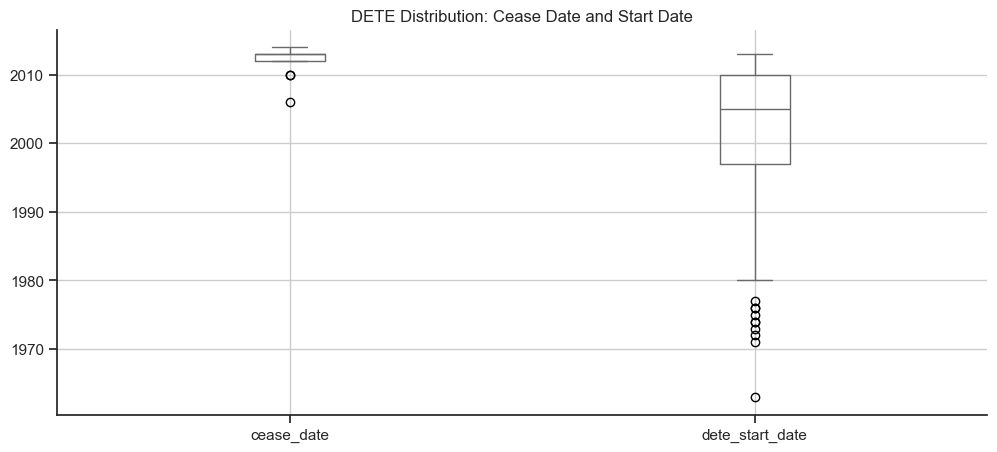

In [24]:
# Create boxplot for cease date, dete start date
plt.figure(figsize=(12,5))
dete_resignations.boxplot(column = ['cease_date', 'dete_start_date'], color='dimgrey')
plt.title('DETE Distribution: Cease Date and Start Date')

plt.show()

In the section above, we looked into the `cease_date` and `dete_start_date` columns and adjusted the DETE `cease_date` column. Finally we plotted a boxplot to show the distribution of the two columns. The `tafe_updated` dataframe contains some cease dates in 2009, but the `dete_updated` dataframe does not. Vice versa, the `dete_updated` dataframe contains cease dates for 2006 but the `tafe_updated` does not. The `tafe_updated` dataframe also contains many more cease dates in 2010 than the `dete_updaed` dataframe and the `dete_updaed` contains many more cease dates in 2013.

In summary:

- There aren't any major issues with the years.
- The years in both dataframes don't completely align. 

Since we aren't concerned with analyzing the results by year, we leave them as they are.

#### New Columns

To answer the following questions below, we need to create a new column for the `DETE` dataframe. Since the `TAFE` dataframe already contains a column, which indicates the duration of service of an employee, called `'institute_service'`, we only need to create one new column for the `DETE` dataframe.

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?
- What about employees who have been at the job longer?

Lets get into it!

In [25]:
# Calculate create a new column which indicates the length of time an employee worked for the company
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

#### The Dissatisfied Employees

Subsequently, we will ascertain individuals who have resigned due to dissatisfaction. To classify employees as `'dissatisfied'` within each dataframe, we will employ the following columns:

`DETE`:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

`TAFE`:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction
  
In cases where an employee has indicated that any of the aforementioned factors led to their resignation, we will designate them as `'dissatisfied'` in a newly created column. Following these modifications, the newly established `'dissatisfied'` column will exclusively contain the following values:

- True: Indicates resign due to dissatisfaction
- False: Indicates resign not due to dissatisfaction
- NaN: indicates missing value

##### TAFE

In [26]:
# Check unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64

In [27]:
# Check unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64

In [28]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_values(val):
    if pd.isna(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
        
dissatisfaction_columns = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

# Create copy to avoid the `SettingWithCopyWarning`
tafe_resignations_up = tafe_resignations.copy()

# Use applymap and update_values-function to update values to `True`, `False` or NaN
tafe_resignations_up[dissatisfaction_columns] = tafe_resignations_up[dissatisfaction_columns].applymap(update_values)

C:\Users\mexic\AppData\Local\Temp\ipykernel_15988\340449046.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tafe_resignations_up[dissatisfaction_columns] = tafe_resignations_up[dissatisfaction_columns].applymap(update_values)


In [29]:
tafe_resignations_up['dissatisfied'] = np.logical_or(tafe_resignations_up['Contributing Factors. Dissatisfaction'],
                                                   tafe_resignations_up['Contributing Factors. Job Dissatisfaction'])

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    241
True      91
NaN        8
Name: count, dtype: int64

##### DETE

In [30]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 
                                                       'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 
                                                       'work_life_balance', 'workload']].any(axis=1, skipna=True)

# Create copy to avoid the `SettingWithCopyWarning`
dete_resignations_up = dete_resignations.copy()

# Check the unique values after the updates
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    162
True     149
Name: count, dtype: int64

#### Cleaning Age Columns

Later in the analysis, our focus will shift towards investigating the influence of `age` on employees who have resigned, seeking to address the question: 'What is the distribution of resignations attributed to dissatisfaction across various age groups?' As a preparatory step, we will proceed with cleaning the age columns in both the `TAFE` and `DETE` dataframes. Let us examine the values present in these columns.

In [31]:
# Show the values of TAFE age column
tafe_resignations_up['age'].value_counts(dropna=False)

age
NaN              50
41  45           45
46  50           39
51-55            39
21  25           33
36  40           32
31  35           32
26  30           32
56 or older      29
20 or younger     9
Name: count, dtype: int64

In [32]:
# Show the values of DETE age column
dete_resignations_up['age'].value_counts(dropna=False)

age
41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
31-35            29
21-25            29
56-60            26
61 or older      23
NaN               5
20 or younger     1
Name: count, dtype: int64

In [33]:
# Clean the valuess of TAFE age column
tafe_resignations_up['age'] = tafe_resignations_up['age'].str.replace(r'\s+', '-', regex=True).str.replace('-or-', ' or ')
tafe_resignations_up['age'].value_counts(dropna=False)

age
NaN              50
41-45            45
46-50            39
51-55            39
21-25            33
36-40            32
31-35            32
26-30            32
56 or older      29
20 or younger     9
Name: count, dtype: int64

In [34]:
# Clean the valuess of DETE age column
dete_resignations_up['age'] = dete_resignations_up['age'].str.replace('61 or older', '56 or older').str.replace('56-60', '56 or older')
dete_resignations_up['age'].value_counts(dropna=False)

age
56 or older      49
41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
31-35            29
21-25            29
NaN               5
20 or younger     1
Name: count, dtype: int64

#### Cleaning Service Column

The `institute_service` column provides information about how long an employee has been working within the organization. We'll adjust these columns and categorize employees according to the following definitions and store the new values into a new column named `service_cat`:

- New: Less than 3 years in the workplace
- Experienced: 3-6 years in the workplace
- Established: 7-10 years in the workplace
- Veteran: 11 or more years in the workplace

According to insights presented in this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), it is asserted that comprehending employees needs based on career stage rather than age proves to be more effective. Consequently, this categorization appears to align with a logical framework.

In [35]:
# Check unique values
dete_resignations_up['institute_service'].value_counts(dropna=False)

institute_service
NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
17.0     6
10.0     6
22.0     6
14.0     6
12.0     6
18.0     5
16.0     5
24.0     4
11.0     4
23.0     4
21.0     3
19.0     3
39.0     3
32.0     3
25.0     2
28.0     2
26.0     2
36.0     2
30.0     2
34.0     1
29.0     1
27.0     1
42.0     1
33.0     1
41.0     1
49.0     1
35.0     1
38.0     1
31.0     1
Name: count, dtype: int64

In [36]:
tafe_resignations_up['institute_service'].value_counts(dropna=False)

institute_service
Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: count, dtype: int64

In [37]:
# Extract the years and then convert to float
tafe_resignations_up['institute_service'] = tafe_resignations_up['institute_service'].astype('str').str.extract(r'(\d+)').astype('float')

# Check unique values
tafe_resignations_up['institute_service'].value_counts(dropna=False)

institute_service
1.0     137
3.0      63
NaN      50
5.0      33
11.0     26
7.0      21
20.0     10
Name: count, dtype: int64

We are now prepared to establish the `service_cat` column and store the corresponding values within this new column.






In [38]:
# Convert years of service to categories
def institution_years(val):
    if val <= 2:
        return 'New'
    elif val >= 3 and val < 7:
        return 'Experienced'
    elif val >= 7 and val < 11:
        return 'Established'
    elif pd.isnull(val):
        return np.nan     
    else: 
        return 'Veteran'

# Apply function to 'institute_service_up' column, create new column 'service_cat'
tafe_resignations_up['service_cat'] = tafe_resignations_up['institute_service'].apply(institution_years)
dete_resignations_up['service_cat'] = dete_resignations_up['institute_service'].apply(institution_years)

In [39]:
# Check new column for TAFE
tafe_resignations_up['service_cat'].value_counts(dropna=False)

service_cat
New            137
Experienced     96
NaN             50
Veteran         36
Established     21
Name: count, dtype: int64

In [40]:
# Check new column for DETE
dete_resignations_up['service_cat'].value_counts(dropna=False)

service_cat
Veteran        100
Experienced     76
New             56
Established     41
NaN             38
Name: count, dtype: int64

What did we do on the last steps above?

1. First, we transformed the column `institute_service` to `str` and then we used `.str.extract()` with `regex` pattern, to extract just the year.
2. Then, we converted that column to float and created a function, which returns specific values for years of service.
3. Finally we use this function to create a new column with the values based on service time called `service_cat`.

The Result of our data manipulations looks as follows:

`TAFE` employees

- 137 New 
- 96 Experienced 
- 21 Established
- 36 Veteran

`DETE` employees

- 56 New
- 76 Experienced
- 41 Established
- 100 Veteran

#### Finalizing Data Cleaning

In this part, we'll finalize our data cleaning process. To do so, we'll remove rows containing missing values and finally eliminate any remaining redundant columns.





##### TAFE

In [41]:
# Look at current columns of TAFE dataframe
tafe_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 3 to 701
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    object

In [42]:
# Drop redundant columns from index 5 - 16 and column 7
tafe_clean = tafe_resignations_up.drop(tafe_resignations_up.columns[5:17], axis=1).copy()
tafe_clean = tafe_clean.drop(tafe_clean.columns[7], axis=1)

# Drop rows (axis=0, default) if any NA values are present in `service_cat` or `age`.
tafe_clean = tafe_clean.dropna(subset=['service_cat', 'age'], how='any')

# Check values after dropping columns
tafe_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 4 to 701
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 290 non-null    float64
 1   Institute          290 non-null    object 
 2   WorkArea           290 non-null    object 
 3   cease_date         288 non-null    float64
 4   separationtype     290 non-null    object 
 5   gender             290 non-null    object 
 6   age                290 non-null    object 
 7   position           290 non-null    object 
 8   institute_service  290 non-null    float64
 9   role_service       290 non-null    object 
 10  dissatisfied       290 non-null    object 
 11  service_cat        290 non-null    object 
dtypes: float64(3), object(9)
memory usage: 29.5+ KB


##### DETE

In [43]:
# Look at current columns of DETE dataframe
dete_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, 3 to 821
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector        

In [44]:
# Drop redundant columns from index 4 - 28 and 6 - 11
dete_clean = dete_resignations_up.drop(dete_resignations_up.columns[4:28], axis=1).copy()
dete_clean = dete_clean.drop(dete_clean.columns[6:11], axis=1)

# Drop rows (axis=0, default) if any NA values are present in `service_cat` or `age`.
dete_clean = dete_clean.dropna(subset=['service_cat', 'age'], how='any')
dete_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271 entries, 3 to 819
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 271 non-null    int64  
 1   separationtype     271 non-null    object 
 2   cease_date         271 non-null    float64
 3   dete_start_date    271 non-null    float64
 4   gender             266 non-null    object 
 5   age                271 non-null    object 
 6   institute_service  271 non-null    float64
 7   dissatisfied       271 non-null    bool   
 8   service_cat        271 non-null    object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 19.3+ KB


#### Combining Data
Subsequently, we append an `'institution'` column to differentiate the survey data sources after we combine them. Following this, we `concatenate` the dataframes and eliminate any columns that are still not pertinent to our analysis.





In [45]:
# Adding an institute column. 
dete_clean['institute'] = 'DETE'
tafe_clean['institute'] = 'TAFE'

In [46]:
# concatenate the dataframes
concatenated = pd.concat([dete_clean, tafe_clean], ignore_index=True)

# Verify the number of non null values in each column
concatenated.notnull().sum().sort_values()

dete_start_date      271
Institute            290
WorkArea             290
position             290
role_service         290
gender               556
cease_date           559
id                   561
separationtype       561
age                  561
institute_service    561
dissatisfied         561
service_cat          561
institute            561
dtype: int64

There are still columns with a remarkable amount of missing values, therefore we decide to eliminate all column with less than 500 not null values.

In [47]:
# Drop columns with less than 500 non null values
concatenated_clean = concatenated.dropna(thresh=500, axis=1).copy()

concatenated_clean.head()

,id,separationtype,cease_date,gender,age,institute_service,dissatisfied,service_cat,institute
0,4.0,Resignation,2012.0,Female,36-40,7.0,False,Established,DETE
1,6.0,Resignation,2012.0,Female,41-45,18.0,True,Veteran,DETE
2,9.0,Resignation,2012.0,Female,31-35,3.0,False,Experienced,DETE
3,10.0,Resignation,2012.0,Female,46-50,15.0,True,Veteran,DETE
4,12.0,Resignation,2012.0,Male,31-35,3.0,False,Experienced,DETE


#### Analysis: Service Category

First, the percentage of employees who resigned due to dissatisfaction within each `service_cat` group (using the `pivot_table()` method) will be computed and visually presented. 

In [48]:
# Look for unique values
concatenated_clean['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    347
True     214
Name: count, dtype: int64

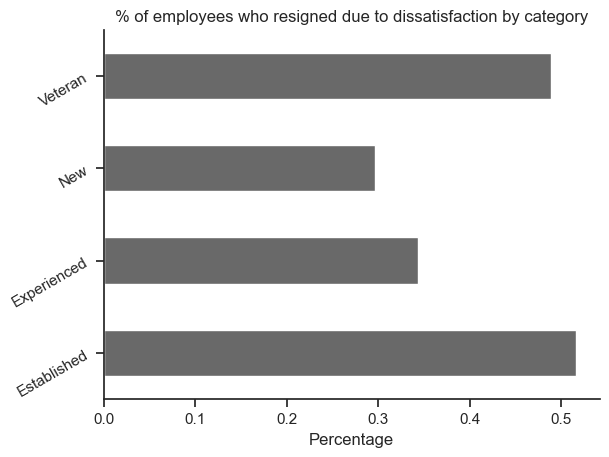

In [49]:
# The percentage of employees who resigned due to dissatisfaction by category
concatenated_clean_pivot = concatenated_clean.pivot_table('dissatisfied', 'service_cat')

# Create the graph
concatenated_clean_pivot.plot(kind='barh', legend=False, color='dimgrey', rot=30, 
                              title='% of employees who resigned due to dissatisfaction by category') 
plt.ylabel('')
plt.xlabel('Percentage')
plt.show()

Based on the analysis above, a tentative inference can be drawn that employees with a tenure of 7 or more years are more inclined to resign as a result of job dissatisfaction compared to those with less than 7 years of service. In detail, about 50 percent of the employees, who have worked for more then seven years for DETE or TAFE resigned due to dissatisfaction reasons.





#### Analysis: Age Category

Having concluded our initial analysis of job-related departures due to dissatisfaction, our subsequent analysis will focus on exploring the correlation between age and dissatisfaction. Prior to the analysis, we will divide the age column into categories: 

- A category for ages `20 or younger` (representing `new` employees)
- A category for ages `21 to 35` (representing `experienced` employees)
- A category for ages `36 to 55` (representing `established` employees)
- And a category for ages `56 or older` (representing the `veteran` employees)






In [50]:
concatenated_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 561 non-null    float64
 1   separationtype     561 non-null    object 
 2   cease_date         559 non-null    float64
 3   gender             556 non-null    object 
 4   age                561 non-null    object 
 5   institute_service  561 non-null    float64
 6   dissatisfied       561 non-null    object 
 7   service_cat        561 non-null    object 
 8   institute          561 non-null    object 
dtypes: float64(3), object(6)
memory usage: 39.6+ KB


In [51]:
# Creating a function to categorize the age column
def update_age(x):
    if x == '20 or younger':
        return x
    if x == '21-25' or x == '26-30' or x == '31-35':
        return '21-35'
    elif x == '36-40' or x == '41-45' or x == '46-50' or x == '51-55':
        return '36-55'
    elif x == '56 or older':
        return x
    else:
        return np.nan

concatenated_clean['age_cat'] = concatenated_clean['age'].apply(update_age)

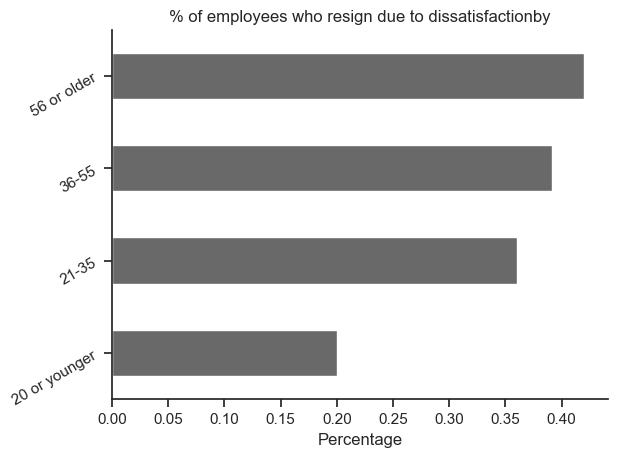

In [52]:
# The percentage of employees who resigned due to dissatisfaction by age
concatenated_clean_age = concatenated_clean.pivot_table('dissatisfied', 'age_cat')

# Create the graph
concatenated_clean_age.plot(kind='barh', title='% of employees who resign due to dissatisfactionby', 
                            legend=False, color='dimgrey', rot=30)
plt.ylabel('')
plt.xlabel('Percentage')
plt.show()

Above, we graphically represented the `age_cat` column in relation to `dissatisfied`. It is evident that the cohort displaying the highest dissatisfaction rate is the `56 or older` group, comprising approximately 42%. This indicates that employees aged `56 or older` tended to resign due to dissatisfaction approximately 42% of the time. Conversely, the age group with the lowest dissatisfaction rate is the `20 or younger` category, where employees resigned due to dissatisfaction approximately 20% of the time.

**Why do older employees tend to resign due to dissatisfaction more then younger employees?**

There are several possible factors that could contribute to this observation:

- Retirement plans: Older workers may have retirement plans and financial stability that give them the option to quit if they are dissatisfied with their current work situation.
- Experience and tolerance: Older people may have more work experience, which makes them less tolerant of adverse working conditions or practices.
- Generational differences: There could be generational differences in work values and expectations that affect how different age groups respond to job dissatisfaction.

#### Analysis: DETE vs. TAFE

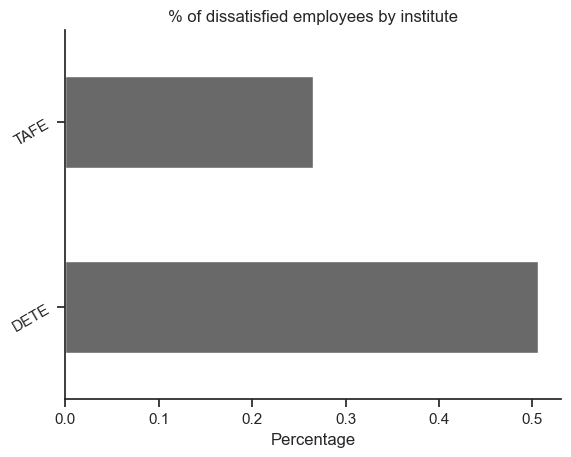

In [53]:
# The percentage of employees who resigned due to dissatisfaction by institute
concatenated_clean_institute = concatenated_clean.pivot_table('dissatisfied', ['institute'])

# Create the graph
concatenated_clean_institute.plot(kind='barh', title='% of dissatisfied employees by institute', 
                                  legend=False, color='dimgrey', rot=30)
plt.ylabel('')
plt.xlabel('Percentage')
plt.show()

In our analysis, we conducted a grouping based on the institute. The visual representation illustrates that approximately half of the employees from the DETE institute resigned due to reasons associated with dissatisfaction, while in the TAFE institute, around 25% of resignations were attributed to dissatisfaction. Consequently, employees at the DETE institute exhibited a resignation rate due to dissatisfaction that was approximately 25% higher than their counterparts at the TAFE institute.





Throughout this project, we encountered the necessity of executing several data cleaning procedures to derive meaningful insights from our dataset. In order to create visualizations, we undertook the following tasks:

- Explored the data and figured out how to prepare it for analysis
- Corrected the missing values
- Dropped any data not needed for our analysis
- Renamed our columns
- Verified the quality of our data
- Created a new institute_service column
- Cleaned the Contributing Factors columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way
- Cleaned the institute_service column
- Cleaned the age column
- Combined the data
- Aggregated the data

To summarize the analysis, we can say that:

- Employees with a tenure of `7 or more` years are more inclined to resign as a result of job `dissatisfaction` compared to those with less than 7 years of service
- The cohort displaying the highest dissatisfaction rate is the `56 or older` group
- Employees at the `DETE` institute exhibited a resignation rate due to dissatisfaction (50%) that was approximately 25% higher than their counterparts at the `TAFE` institute.